In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

raw = pd.read_csv('./data/assignment2data.csv')

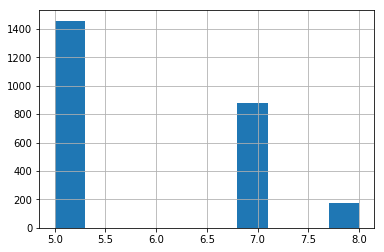

In [3]:
# Plot output values. Since the output qualities
# are either 5, 7 or 8, consider this a three class binary classification problem
raw['quality'].hist(bins=10)

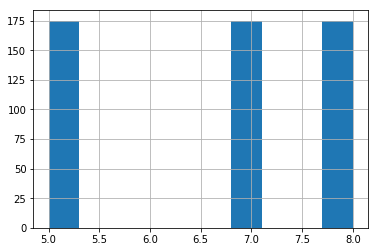

In [4]:
high = raw[raw.quality == 8]
med = raw[raw.quality == 7]
low = raw[raw.quality == 5]

# Get the lowest n per category
nPerCategory = min(len(high), len(med), len(low))

df = pd.concat([
    high.sample(n=nPerCategory),
    med.sample(n=nPerCategory),
    low.sample(n=nPerCategory)
])

df.quality.hist(bins=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.059107,0.232586,0.238204,0.120799,-0.046956,0.143126,0.432240,-0.479901,-0.083997,-0.327478,-0.193597
volatile acidity,-0.059107,1.000000,-0.091064,0.039436,0.014048,-0.112098,0.061324,-0.075360,-0.008551,-0.132938,0.175165,-0.117733
citric acid,0.232586,-0.091064,1.000000,0.116892,0.121195,0.119245,0.158380,0.173273,-0.099228,0.040247,-0.117725,-0.109719
residual sugar,0.238204,0.039436,0.116892,1.000000,0.278764,0.249264,0.457346,0.830153,-0.301487,-0.121309,-0.512617,-0.239038
chlorides,0.120799,0.014048,0.121195,0.278764,1.000000,0.135157,0.330456,0.436835,-0.174431,-0.032806,-0.475256,-0.321502
free sulfur dioxide,-0.046956,-0.112098,0.119245,0.249264,0.135157,1.000000,0.585702,0.248201,0.039386,0.136171,-0.201034,-0.055332
total sulfur dioxide,0.143126,0.061324,0.158380,0.457346,0.330456,0.585702,1.000000,0.601694,-0.020408,0.052931,-0.533312,-0.320607
density,0.432240,-0.075360,0.173273,0.830153,0.436835,0.248201,0.601694,1.000000,-0.221609,0.008708,-0.860052,-0.467533
pH,-0.479901,-0.008551,-0.099228,-0.301487,-0.174431,0.039386,-0.020408,-0.221609,1.000000,0.224009,0.206390,0.182024
sulphates,-0.083997,-0.132938,0.040247,-0.121309,-0.032806,0.136171,0.052931,0.008708,0.224009,1.000000,-0.012435,0.044301


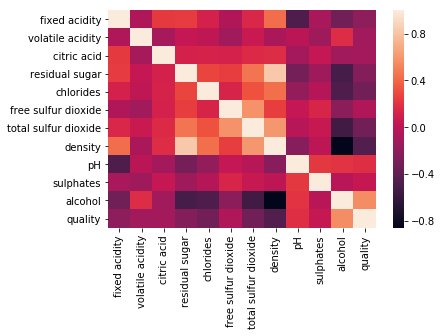

In [5]:

import seaborn as sns

sns.heatmap(df.corr())
df.corr()

,chlorides,total sulfur dioxide,density,pH,alcohol,quality
chlorides,1.000000,0.330456,0.436835,-0.174431,-0.475256,-0.321502
total sulfur dioxide,0.330456,1.000000,0.601694,-0.020408,-0.533312,-0.320607
density,0.436835,0.601694,1.000000,-0.221609,-0.860052,-0.467533
pH,-0.174431,-0.020408,-0.221609,1.000000,0.206390,0.182024
alcohol,-0.475256,-0.533312,-0.860052,0.206390,1.000000,0.559876
quality,-0.321502,-0.320607,-0.467533,0.182024,0.559876,1.000000


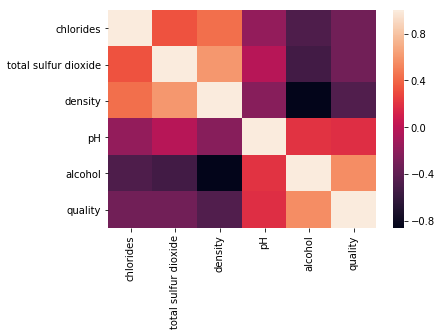

In [6]:
processed = df.drop(
    [
        #'density',
        'citric acid',
        'fixed acidity',
        'volatile acidity',
        'sulphates',
        'residual sugar',
        'free sulfur dioxide',
        #'alcohol'
        #'density',
        #'chlorides',
        #'total sulfur dioxide'
    ], 1)

processed = processed.sample(frac=1)

sns.heatmap(processed.corr())
processed.corr()

In [8]:
normed = (processed - processed.min())/(processed.max() - processed.min())
normed.quality = normed.quality * 3 + 5
training = normed[:420]
testing = normed[420:]

normed

,chlorides,total sulfur dioxide,density,pH,alcohol,quality
1452,0.101322,0.149758,0.243379,0.456522,0.535714,7.0
1495,0.083700,0.246377,0.518253,0.445652,0.553571,8.0
768,0.092511,0.159420,0.370079,0.163043,0.357143,7.0
2159,0.185022,0.425121,0.467430,0.250000,0.196429,5.0
1791,0.079295,0.444444,0.235505,0.336957,0.732143,8.0
661,0.066079,0.376812,0.420186,0.184783,0.482143,8.0
952,0.083700,0.574879,0.549034,0.293478,0.517857,7.0
1216,0.066079,0.294686,0.218325,0.532609,0.785714,8.0
2208,0.127753,0.164251,0.251969,0.500000,0.607143,7.0
1407,0.140969,0.690821,0.930565,0.119565,0.053571,5.0


In [9]:
normed.to_csv("./data/training.csv", index=False)
normed.to_csv("./data/testing.csv", index=False)

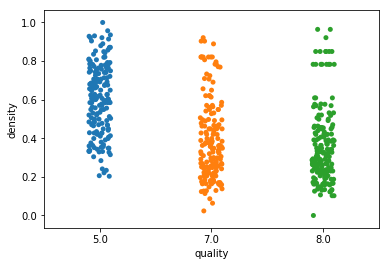

In [17]:
sns.stripplot(x='quality', y='density', data=normed, jitter=True)


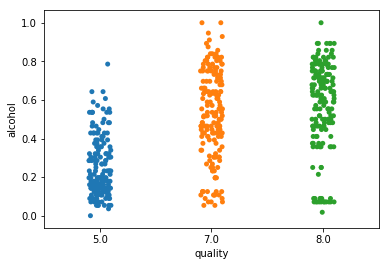

In [19]:
sns.stripplot(x='quality', y='alcohol', data=normed, jitter=True)

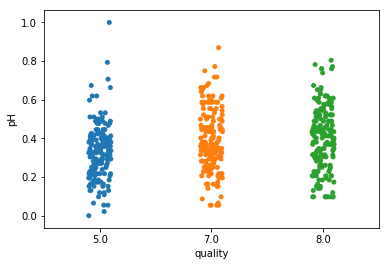

In [20]:
sns.stripplot(x='quality', y='pH', data=normed, jitter=True)

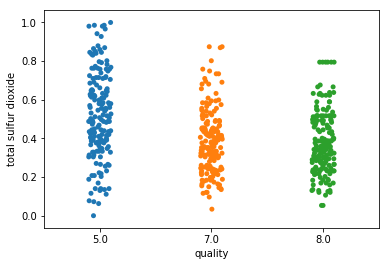

In [22]:
sns.stripplot(x='quality', y='total sulfur dioxide', data=normed, jitter=True)